In [14]:
#list
A = [1,2,3,4,5,6]
B = [13, 21, 34]
C = A + B
D = A.append(B)
E = A.extend(B)
print(C)
print(D) #append does not work
print(E) #extend does not work

[1, 2, 3, 4, 5, 6, 13, 21, 34]
None
None


In [17]:
import numpy as np
np.identity(3) #3x3 array of identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
#Pandas
import pandas as pd
csv_df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')
#csv_df.to_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv', index=False)

In [22]:
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv' 
fuel_data = pd.read_csv(url, error_bad_lines=False) 
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2001_12_63_0_4,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [23]:
#check for missing values 
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [24]:
#use groupby to count the sum of each unique value in the fuel unit column 
fuel_data.groupby('fuel_unit')['fuel_unit'].count() 
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')  

In [25]:
#check if missing values have been filled 
fuel_data.isnull().sum() 
fuel_data.groupby('report_year')['report_year'].count() 

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [26]:
#group by the fuel type code year and print the first entries in all the groups formed              
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [28]:
#Merging in Pandas can be likened to join operations in relational databases like SQL 
fuel_df1 = fuel_data.iloc[0:19000].reset_index(drop=True) 
fuel_df2 = fuel_data.iloc[19000:].reset_index(drop=True)
#check that the length of both dataframes sum to the expected length assert 
len(fuel_data) == (len(fuel_df1) + len(fuel_df2))  

True

In [29]:
#outer merge returns all rows in both dataframes 
pd.merge(fuel_df1, fuel_df2, how="outer")  

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [30]:
#removes rows from the right dataframe that do not have a match with the left 
#and keeps all rows from the left 
pd.merge(fuel_df1, fuel_df2, how="left") 

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570
...,...,...,...,...,...,...,...,...,...,...,...
18995,f1_fuel_2009_12_182_1_9,182,2009,lake road,gas,mcf,340857.0,1.000000,4.711,4.711,4.711
18996,f1_fuel_2009_12_182_1_10,182,2009,lake road,oil,mcf,771.0,5.801544,84.899,84.899,14.634
18997,f1_fuel_2009_12_182_1_13,182,2009,iatan (18%),coal,ton,414142.0,16.718000,18.509,17.570,1.107
18998,f1_fuel_2009_12_182_1_14,182,2009,iatan (18%),oil,bbl,5761.0,5.537910,83.636,72.280,15.102


In [32]:
#standard deviattion
print(fuel_data.std())

utility_id_ferc1                7.417835e+01
report_year                     7.025483e+00
fuel_qty_burned                 9.118004e+06
fuel_mmbtu_per_unit             1.060022e+01
fuel_cost_per_unit_burned       2.854490e+03
fuel_cost_per_unit_delivered    6.877593e+04
fuel_cost_per_mmbtu             2.091541e+03
dtype: float64


In [34]:
#75th percentile
print(fuel_data.quantile(0.75)) # 75th percentile

utility_id_ferc1                    176.000
report_year                        2012.000
fuel_qty_burned                 1424034.000
fuel_mmbtu_per_unit                  17.006
fuel_cost_per_unit_burned            47.113
fuel_cost_per_unit_delivered         42.137
fuel_cost_per_mmbtu                   7.745
Name: 0.75, dtype: float64


In [35]:
#skew
dataFrame = pd.DataFrame(data=fuel_data);
skewValue = dataFrame.skew(axis=1)
print(skewValue)

0        2.645751
1        2.645751
2        2.645749
3        2.645750
4        2.632823
           ...   
29518    2.585605
29519    2.645718
29520    2.643757
29521    2.645533
29522    2.579144
Length: 29523, dtype: float64


In [37]:
#kurt
dataFrame = pd.DataFrame(data=fuel_data);
kurt = dataFrame.kurt(axis=1)
print(kurt)

0        6.999997
1        6.999999
2        6.999990
3        6.999994
4        6.945907
           ...   
29518    6.737906
29519    6.999864
29520    6.991838
29521    6.999116
29522    6.708633
Length: 29523, dtype: float64


NameError: name 'sample_df' is not defined

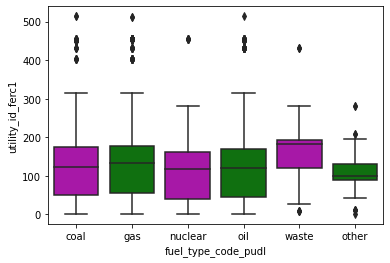

In [38]:
# Import plotting library
import seaborn as sns

# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)
# KDE plot 
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

Text(0.5, 0, 'Fuel Unit')

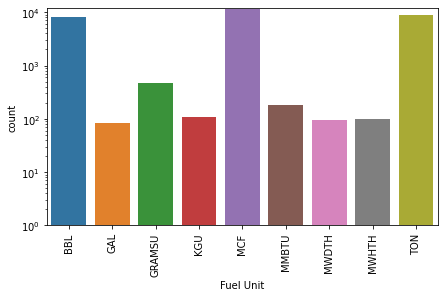

In [39]:
# Import plotting library
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:


g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

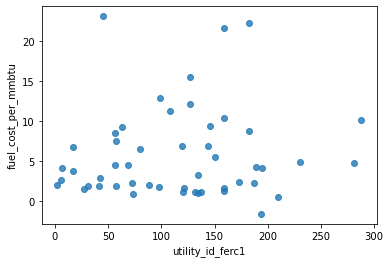

In [40]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)